<a href="https://colab.research.google.com/github/Fritz-Rodrigo/Numerical_Analysis/blob/main/2020-2_julio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1

We denote $fl(\beta, p, L, U)$ the floating-point number system of base $\beta$ with precision $p$ and exponent range $[L, U]$.

**a)** By use of truncation, find the smallest positve element of the system $fl(10, 4, −9, 9)$ that satisfies

$$x ⊕ \text{float}(π) = x$$

To begin, $\text{float}(\pi) = 3.141$, then

$$\text{float}(10,000 + \pi) = (1 + 3.141\times10^{-4})\times10^{4} = 10^4$$

The next smaller number of the system is $9,999 = 9.999 \times 10^3$, for which

$$\text{float}(9999 + \pi) = (9.999 + 3.141 \times 10^{-3})\times10^{3} = \text{float}(10.002 \times 10^3) = 10.00 \times 10^3 = 10,000$$

i.e. $\boxed{x=10^4}$ is the smallest number that satisfies the equation. This is equivalent to $\boxed{\beta^p}$

In [ ]:
(9.999+3.141e-3)

10.002141

Since $$\beta = 10,\ p=4,\ L=-9,\ U=9$$

there's a total of $2(\beta-1)\beta^{p-1}(U-L+1)+1 = 18(10^3)(19) + 1 = \boxed{342,001}$ elements of the system,

from $\boxed{\text{UFL} = \beta^L = 10^{-9}}$

to $\beta^{U}(\beta - \epsilon_\text{mach}) = \beta^{U}(\beta - \beta^{1-p}) = 10^9(10 - 10^{-3}) = 9,999,000,000$ i.e. $\boxed{\text{OFL} = 9.999\times10^9}$

with $\epsilon_\text{mach} = \beta^{1-p} = 10^{-3} = 0.001$

If we set $d_0 = 1$ how many numbers can we write?

$2(10^3)(19) = 38,000$ the same for $d_0 = 2,\dots,9$

In [ ]:
38000*9

342000

The mantissa takes the values $1.000, 1.001, \dots, 9.998, 9.999$,

those are 9999 numbers for each $10^E$ with $-9 \leq E \leq 9$

In [ ]:
count = []
n = 1
for E in range(0,2): #range(-9,10):
  # for i in range(1,4):
    for j in range(10000):
      # count.append(m*10**E)
      # k = i + j/1000
      k = j/1000
      # print(k)
      count.append(k)
# print(k)
len(count), count[-10:]

(20000, [9.99, 9.991, 9.992, 9.993, 9.994, 9.995, 9.996, 9.997, 9.998, 9.999])

In [ ]:
2/1000

0.002

**b)** How many numbers of the system $fl(10, 5, −5, 7)$ are greater than 1000?

There are $2(\beta-1)\beta^{p-1}(U-L+1)+1 = 18(10^4)(13) + 1 = 2,340,001$ elements in the system,

from $\beta^L = 10^{-5}$ 

to $\beta^{U+1}(1 - \beta^{-p}) = 10^8(1 - 10^{-5}) = 99,999,000 = 9.9999\times10^7$

In [ ]:
18*(10**4)*13 + 1

2340001

In [ ]:
(10**8)*(1-10**-5)

99999000.0

Let's consider a new floating-point system restricted to the positives and that's begins with 1000, i.e. $fl(10, 5, 3, 7)$, $L=3$.

In this new system the UFL is $10^3 = 1000$, but the OFL is the same.

We don't need neither the negatives nor zero, so we don't need neither to muitiply by 2 nor to sum 1.

If we were to add the negatives, we'll see a jump like this:

$$-99,999,000, ... ,-1002,-1001,-1000,\quad 1000,1001,1002, ... 99,999,000$$

And there are $\boxed{9(10^4)(5) = 450,000}$ elements in this new system, which are exactly the elements greater than 1000 in the original system.

In [ ]:
9*(10**4)*5

450000

**c)** Justifique por qué $\dfrac{1}{5}$ no puede representarse exactamente en un sistema binario
de precisión finita.

Porque $1/5 = 0.2$ no tiene una expansión binaria finita.

Para pasar a binario:
$$\begin{align}
(0.2)2 = 0.4 = 0 + 0.4 \\
(0.4)2 = 0.8 = 0 + 0.8 \\
(0.8)2 = 1.6 = 1 + 0.6 \\
(0.6)2 = 1.2 = 1 + 0.2 \\
\end{align}$$

así que se tiene un binario periódico con periodo 0011 en los decimales, i.e.

$$0.0011 0011 0011 \dots$$

In [ ]:
0.001100110011

## 2 Álgebra Lineal Numérica

**a)** Sea $H$ una matriz de Householder $n \times n$. Pruebe que
$$\hat{H} =
\begin{bmatrix}
I_{m \times m} & O_{m \times n} \\
O_{n \times m} & H
\end{bmatrix}$$
es una matriz de Householder.

P.d. $$\hat{H} = I - 2\frac{uu^T}{u^Tu}$$
para algún vector $u \in \mathbb{R}^{n+m}$, dado que
$$H = I_{n \times n} - 2\frac{vv^T}{v^Tv}$$
con $v \in \mathbb{R}^n$

Si tomamos al vector de Householder como el $$\boxed{u = (0_1, \dots, 0_m, v_1, \dots, v_n)^T}$$
entonces $$v^Tv = \| v \|^2 = \| u \|^2 = u^Tu$$
y $$(uu^T)_{ij} = u_iu_j = 0 \quad \text{si} \quad i,j \leq m$$

esto es
$$uu^T =
\begin{bmatrix}
O_{m \times m} & O_{m \times n} \\
O_{n \times m} & vv^T
\end{bmatrix}$$

por lo tanto
$$
\hat{H}
= 
\begin{bmatrix}
I_{m \times m} & O_{m \times n} \\
O_{n \times m} & H
\end{bmatrix}
=
\begin{bmatrix}
I_{m \times m} & O_{m \times n} \\
O_{n \times m} & I_{n \times n} - 2\dfrac{vv^T}{v^Tv}
\end{bmatrix}
= I - 2\frac{uu^T}{u^Tu}
$$

$ $

**b)** Considere las rectas
$$0.641x + 0.242y = 0.883$$

$$0.321x + 0.121y = 0.442$$

Halle el punto de intersección usando precisión de tres dígitos con redondeo al más cercano y compárelo con la solución exacta.
Dé una interpretación geométrica de la sensibilidad del sistema.

La solución exacta se encuentra restando 2 veces la segunda ecuación menos la primera, $0.001x = 0.001$, por lo tanto $x = 1$ y $y = 1$

Con precisión de 3 dígitos con redondeo, se obtiene que

$$y = \frac{0.883 - 0.641x}{0.242} = 3.65 - 2.65x$$

$$y = \frac{0.442 - 0.321x}{0.121} = 3.65 - 2.65x$$

es decir, se obtiene **la misma recta** y todos sus puntos se intersecan, en lugar de solo uno.

Con 4 dígitos se obtiene

$$y = \frac{0.883 - 0.641x}{0.242} = 3.649 - 2.649x$$

$$y = \frac{0.442 - 0.321x}{0.121} = 3.653 - 2.653x$$

entonces $0.004x = 0.004$, esto es $x=1, y=1$

Tenemos que el 
$$\text{número de condición} \approx \left| \dfrac{xf'(x)}{f(x)} \right| = \left| \dfrac{- 2.65x}{3.65 - 2.65x} \right|$$

que es igual a $2.65$ en $x=1$. Como el número de condición es mayor a uno, tenemos una sensibilidad alta en $x=1$. Con las rectas originales se obtiene un número de condición de $0.641$ y $0.321$, respectivamente, en $x=1$.

In [ ]:
0.641/(0.883-0.641)

2.6487603305785123

In [ ]:
0.321/(0.442-0.321)

2.6528925619834713

In [ ]:
def cond(x):
    return 2.65*x/abs(3.65 - 2.65*x)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

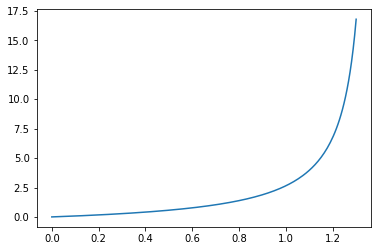

In [ ]:
x = np.linspace(0,1.3,201)
plt.plot(x,cond(x),'-')
plt.show()

In [ ]:
3.65/2.65

1.3773584905660377

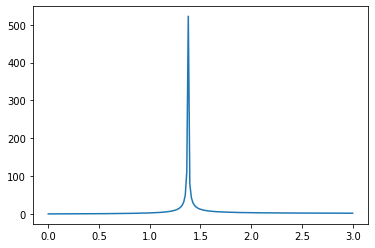

In [ ]:
x = np.linspace(0,3,201)
plt.plot(x,cond(x),'-')
plt.show()

In [ ]:
0.883/0.242

3.6487603305785123

In [ ]:
0.641/0.242

2.6487603305785123

In [ ]:
0.442/0.121

3.6528925619834713

In [ ]:
0.321/0.121

2.6528925619834713

In [ ]:
0.442/0.121 - 2*(0.321/0.121)

-1.6528925619834713

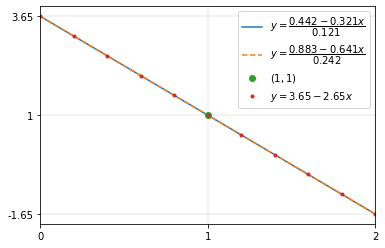

In [ ]:
x = np.linspace(0,2,11)
plt.plot(x, (0.442 - 0.321*x)/0.121, label='$y = \dfrac{0.442 - 0.321x}{0.121}$')
plt.plot(x, (0.883 - 0.641*x)/0.242, '--', label='$y = \dfrac{0.883 - 0.641x}{0.242}$')
plt.plot(1,1,'o',label='$(1,1)$')
plt.plot(x, 3.65 - 2.65*x, '.', label='$y = 3.65 - 2.65x$')
#plt.plot([0,2],[3.65,3.65],'k',lw=0.3)
#plt.plot([0,2],[-1.65,-1.65],'k',lw=0.3)
plt.xticks([0,1,2])
plt.yticks([-1.65,1,3.65],[-1.65,1,3.65])
plt.xlim(0,2)
plt.legend()
plt.grid(lw=0.3)

## 3 Problema de Cuadrados Mínimos
Dados los puntos $P_i = (x_i, y_i),\ i = 1, \dots , n$ queremos calcular los valores de los
parámetros $\beta_0, \beta_1 \in \mathbb{R}$ de la recta $l$:

$$y = \beta_0 + \beta_1x$$

de modo que la suma de los cuadrados de las distancias ortogonales de los puntos $P_i$ a la recta sea mínima.

**a)** Halle una expresión para la función objetivo $f(\mathbf{\beta})$ en términos del residual

$$r(\mathbf{\beta}) = \mathbf{y} - \beta_0\mathbf{1} - \beta_1 \mathbf{x}$$

donde $\mathbf{\beta} = [\beta_0, \beta_1]^T$, $\mathbf{1}$ es el vector de unos y $\mathbf{x}$, $\mathbf{y}$ son vectores con elementos $x_i$, $y_i$, respectivamente.

**b)** Pruebe que los valores óptimos de los parámetros $\beta_0$ y $\beta_1$ satisfacen la ecuación

$$\beta_0 = \text{Promedio}(y_i) - \beta_1\text{Promedio}(x_i)$$

**c)** Calcule los valores óptimos de los parámetros $\beta_0$ y $\beta_1$ de la recta $l$ que ajusta
los puntos $P_1 = (-3,1)$, $P_2 = (-1,1)$ y $P_3 = (1,5)$ con la distancia ortogonal y
compare su resultado con la solución de la regresión lineal correspondiente.

$ $

El sistema que queremos resolver es el
$$
A\mathbf{\beta} = \begin{bmatrix}
1 & x_1 \\
\vdots & \vdots \\
1 & x_n
\end{bmatrix}
\begin{bmatrix}
    \beta_0 \\
    \beta_1
\end{bmatrix}
\simeq
\begin{bmatrix}
    y_1 \\
    \vdots \\
    y_n
\end{bmatrix} = \mathbf{y}
$$

con
$$r(\mathbf{\beta}) = \mathbf{y} - A\beta = \mathbf{y} - \beta_0\mathbf{1} - \beta_1 \mathbf{x}$$

$ $

La función objetivo $f(\mathbf{\beta})$ se define como el cuadrado de la norma Euclideana del vector residual:

$$\boxed{f(\mathbf{\beta}) = \| r(\mathbf{\beta}) \|^2 = r(\mathbf{\beta})^Tr(\mathbf{\beta})} = (y - A\beta)^T(y - A\beta) = y^Ty - 2\beta^TA^Ty + \beta^TA^TA\beta$$

$$= (\mathbf{y} - \beta_0\mathbf{1} - \beta_1 \mathbf{x})^T(\mathbf{y} - \beta_0\mathbf{1} - \beta_1 \mathbf{x})
= \mathbf{y}^T\mathbf{y} - 2(\beta_0\mathbf{1} - \beta_1 \mathbf{x})^T\mathbf{y} + (\beta_0\mathbf{1} - \beta_1 \mathbf{x})^T(\beta_0\mathbf{1} - \beta_1 \mathbf{x})$$

$ $

Una condición necesaria para un mínimo de $f(\beta)$ es que $\beta$ sea un punto crítico, donde el vector gradiente debe ser cero:

$$\nabla f(\beta) = 2A^TA\beta - 2A^Ty = 0$$

así que cualquier vector $\beta$ que minimice a $f(\beta)$ debe satisfacer el sistema

$$A^TA\beta = A^Ty$$

$ $

$$A^TA\mathbf{\beta} = 
\begin{bmatrix}
1 & \cdots & 1 \\
x_1 & \cdots & x_n
\end{bmatrix}
\begin{bmatrix}
1 & x_1 \\
\vdots & \vdots \\
1 & x_n
\end{bmatrix}
\begin{bmatrix}
    \beta_0 \\
    \beta_1
\end{bmatrix}
=
\begin{bmatrix}
1 & \cdots & 1 \\
x_1 & \cdots & x_n
\end{bmatrix}
\begin{bmatrix}
    y_1 \\
    \vdots \\
    y_n
\end{bmatrix}
= A^T\mathbf{y}$$

$ $

$$A^TA\mathbf{\beta} = 
\begin{bmatrix}
n\beta_0 + \beta_1\sum x_i \\
\beta_0\sum x_i + \beta_1\sum x_i^2
\end{bmatrix}
=
\begin{bmatrix}
\sum y_i \\
\sum x_i y_i
\end{bmatrix}
= A^T\mathbf{y}$$

por lo tanto

$$\boxed{\beta_0 = \frac{\sum y_i - \beta_1\sum x_i}{n} = \bar{y} - \beta_1\bar{x}}$$

$$\beta_0 = \frac{\sum x_i y_i - \beta_1\sum x_i^2}{\sum x_i}$$

$ $

La recta que ajusta los puntos $P_1 = (-3,1)$, $P_2 = (-1,1)$ y $P_3 = (1,5)$ se obtiene con las ecuaciones anteriores

$$\beta_0 = \frac{7 + 3\beta_1}{3}$$

$$\beta_0 = \frac{1 - 11\beta_1}{-3} = \frac{11\beta_1 - 1}{3}$$

por lo tanto $$\beta_1 = 1, \qquad \beta_0 = \dfrac{10}{3}$$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

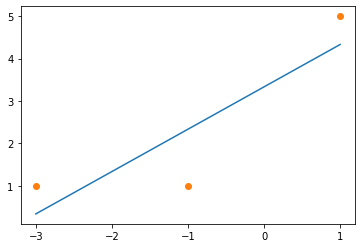

In [ ]:
x = np.linspace(-3,1,11)
plt.plot(x, 10/3 + x)
plt.plot([-3,-1,1], [1,1,5], 'o')
plt.xticks(range(-3,2))
plt.show()

# 4

Sea $f$ una función diferenciable sobre el intervalo finito $[a,b]$. Determine
los pesos $w_i$ de la regla de cuadratura

$$\int_a^b f(x)\ dx \approx w_0 f(a) + w_1 f(b) + w_2 f'(a) + w_3 f'(b)$$

de modo que sea exacta para polinomios del grado más alto posible.

$$\begin{align}
w_0 + w_1 & = \int_a^b dx = b-a \\\\
w_0 x_0 + w_1 x_1 + w_2 + w_3 & = \int_a^b x\ dx = \frac{b^2 - a^2}{2} \\\\
w_0 x_0^2 + w_1 x_1^2 + 2w_2 x_2 + 2w_3 x_3 & = \int_a^b x^2\ dx = \frac{b^3 - a^3}{3} \\\\
w_0 x_0^3 + w_1 x_1^3 + 3w_2 x_2^2 + 3w_3 x_3^2 & = \int_a^b x^3\ dx = \frac{b^4 - a^4}{4}
\end{align}$$

El sistema matricial es
$$
\left(
\begin{array}{cccc|c}
1 & 1 & 0 & 0 & b-a \\
a & b & 1 & 1 & (b^2 - a^2)/2 \\
a^2 & b^2 & 2a & 2b & (b^3 - a^3)/3 \\
a^3 & b^3 & 3a^2 & 3b^2 & (b^4 - a^4)/4
\end{array}
\right)
\sim
\left(
\begin{array}{cccc|c}
1 & 1 & 0 & 0 & b-a \\
0 & b-a & 1 & 1 & (b - a)^2/2 \\
0 & b^2-a^2 & 2a & 2b & (b^3 - 3ba^2 + 2a^3)/3 \\
0 & b^3-a^3 & 3a^2 & 3b^2 & (b^4 - 4ba^3 + 3a^4)/4
\end{array}
\right)
$$

$$
\sim
\left(
\begin{array}{cccc|c}
1 & 1 & 0 & 0 & b-a \\
0 & b-a & 1 & 1 & (b - a)^2/2 \\
0 & 0 & b-a & a-b & (b - a)^3/6 \\
0 & 0 & b^2 + ba - 2a^2 & a^2 + ab - 2b^2 & (b^4 - 2b^3a + 2ba^3 - a^4)/4
\end{array}
\right)
$$

pues $$b^3 - a^3 = (b-a)(b^2 + ba + a^2)$$
y $$(b^2 + ba + a^2)\frac{(b-a)^2}{2} - \frac{(b^4 - 4ba^3 + 3a^4)}{4}
= \dfrac{2(b^4 - ba^3 - b^3a + a^4) - b^4 + 4ba^3 - 3a^4}{4} = \dfrac{b^4 - 2b^3a + 2ba^3 - a^4}{4}$$

Como $$(2a + b)(b - a) = b^2 + ba - 2a^2$$

entonces
$$
\sim
\left(
\begin{array}{cccc|c}
1 & 1 & 0 & 0 & b-a \\
0 & b-a & 1 & 1 & (b - a)^2/2 \\
0 & 0 & b-a & -(b-a) & (b - a)^3/6 \\
0 & 0 & 0 & (b-a)^2 & -(b - a)^4/12
\end{array}
\right)
$$

pues

$$\begin{align}
(2a+b)\frac{(b-a)^3}{6} - \dfrac{b^4 - 2b^3a + 2ba^3 - a^4}{4} & = \frac{2b^4 - 2b^3a - 6b^2a^2 + 10ba^3 - 4a^4 - 3(b^4 - 2b^3a + 2ba^3 - a^4)}{12} \\\\
& = \frac{-b^4 + 4b^3a - 6b^2a^2 + 4ba^3 - a^4}{12} = \frac{(b-a)^4}{12}
\end{align}$$

Por lo tanto

$$\boxed{w_0 = \frac{b-a}{2} = w_1} \qquad \qquad \boxed{w_2 = \frac{(b-a)^2}{12} = -w_3}$$

Por ejemplo, calculemos $$\int_1^2 x\cos x\ dx = \big[x\sin x + \cos x\big]_1^2$$

$$\approx w_0 \cos(1) + 2w_1\cos(2) + w_2\big[\cos(1) - \sin(1)\big] + w_3\big[\cos(2) - 2\sin(2)\big]$$

$$= \frac{1}{2}\cos(1) + \cos(2) + \frac{1}{12}\big[\cos(1) - \sin(1) - \cos(2) + 2\sin(2)\big]$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

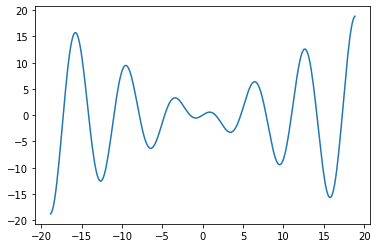

In [ ]:
x = np.linspace(-6*np.pi,6*np.pi,301)
plt.plot(x, x*np.cos(x))
#plt.axhline(y=-0.05, color='k', lw=0.3)
#plt.axvline(x=0.07, color='k', lw=0.3)
plt.show()

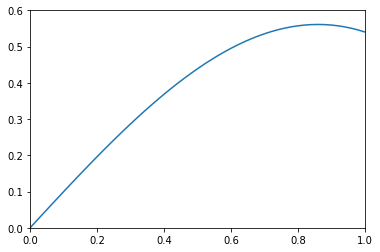

In [ ]:
x = np.linspace(0,1,51)
plt.plot(x, x*np.cos(x))
plt.xlim(0,1)
plt.ylim(0,0.6)
plt.show()

In [ ]:
# de 1 a 2
2*np.sin(2) - np.sin(1) + np.cos(2) - np.cos(1)

0.020674726428184798

In [ ]:
# de 0 a 1
np.sin(1) + np.cos(1) - np.cos(0)

0.38177329067603627

In [ ]:
# de 0 a 2
2*np.sin(2) - np.sin(0) + np.cos(2) - np.cos(0)

0.40244801710422107

In [ ]:
# de -2 a 2
2*np.sin(2) + 2*np.sin(-2) + np.cos(2) - np.cos(-2)

0.0

In [ ]:
# de 1 a 2
np.cos(1)/2 + np.cos(2) + (1/12)*( np.cos(1) - np.sin(1) - np.cos(2) + 2*np.sin(2) )

0.015135400658489895

In [ ]:
# de 0 a 1
np.cos(0)/2 + np.cos(1) + (1/12)*( np.cos(0) - np.sin(1) - np.cos(1) + np.sin(1) )

1.078610447045795

In [ ]:
# de -2 a 2
np.cos(-2)/2 + np.cos(2) + (1/12)*( np.cos(-2) + 2*np.sin(-2) - np.cos(2) + 2*np.sin(2) )

-0.6242202548207136

Por lo tanto esta regla de cuadratura no sirve para aproximar esa integral. Veamos con una función más sencilla, $f(x) = x^2$, entonces

$$\int_1^2 x^2\ dx = \frac{x^3}{3}\Big|_1^2 = \frac{8-1}{3} = \frac{7}{3}$$

$$\int_a^b f(x)\ dx \approx w_0 f(a) + w_1 f(b) + w_2 f'(a) + w_3 f'(b)$$

$$ = \frac{1}{2} + \frac{4}{2} + \frac{1}{12}(2 - 4) = \frac{14}{6} = \frac{7}{3}$$

In [ ]:
7/3

2.3333333333333335

In [ ]:
1/2 + 4/2 + (1/12)*(2 - 4)

2.3333333333333335

# 5

Construya un spline cúbico $s$ que pase por los puntos (1, 2), (2, 3) y (3, 5) tal que $s'(1) = 2$ y $s'(3) = 1$

### Spline Cúbico Natural

Para 3 puntos tenemos 2 intervalos: $[t_1,t_2]$ y $[t_2,t_3]$, así que el interpolante requerido es una función cúbica a trozos definida por 2 polinomios cúbicos. Sea

$$p_\alpha(t) = \alpha_1 + \alpha_2 t + \alpha_3 t^2 + \alpha_4 t^3$$
el polinomio del primer intervalo, y
$$p_\beta(t) = \beta_1 + \beta_2 t + \beta_3 t^2 + \beta_4 t^3$$

el del segundo intervalo. De modo que el sistema de ecuaciones a resolver es el siguiente

$$Ax = 
\begin{pmatrix}
    1 & t_1 & t_1^2 & t_1^3 & 0 & 0 & 0 & 0 \\
    1 & t_2 & t_2^2 & t_2^3 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 1 & t_2 & t_2^2 & t_2^3 \\
    0 & 0 & 0 & 0 & 1 & t_3 & t_3^2 & t_3^3 \\
    0 & 1 & 2t_2 & 3t_2^2 & 0 & -1 & -2t_2 & -3t_2^2 \\
    0 & 0 & 2 & 6t_2 & 0 & 0 & -2 & -6t_2 \\
    0 & 0 & 2 & 6t_1 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 2 & 6t_3 \\
\end{pmatrix}
\begin{pmatrix}
    \alpha_1 \\
    \alpha_2 \\
    \alpha_3 \\
    \alpha_4 \\
    \beta_1 \\
    \beta_2 \\
    \beta_3 \\
    \beta_4 \\
\end{pmatrix}
=
\begin{pmatrix}
    y_1 \\
    y_2 \\
    y_2 \\
    y_3 \\
    0 \\
    0 \\
    0 \\
    0 \\
\end{pmatrix}
= y$$

Las primeras 2 ecuaciones son el polinomio $p_\alpha(t)$ evaluado en los extremos $t_1$ y $t_2$ del primer intervalo y las 2 ecuaciones siguientes son el polinomio $p_\beta(t)$ evaluado en los extremos $t_2$ y $t_3$ del segundo intervalo. Las ecuaciones 2 y 3 deben cumplir que $p_\alpha(t_2) = p_\beta(t_2)$. Las ecuaciones 5 y 6 cumplen la condición de continuidad en la primera derivada en $t_2$, y en la segunda derivada, respectivamente. Finalmente, las ecuaciones 7 y 8 cumplen la restricción del natural spline de que la segunda derivada sea cero en los extremos $t_1$ y $t_3$, respectivamente.

In [ ]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [ ]:
def pol(t,c):
    p = 0
    for i in range(len(c)): #Solo funciona con len(c) y no con len(t), no sé por qué
        p = p + c[i]*(t)**i
    return p

In [ ]:
def cubic_spline(t,s):
    
    n = len(t)
    A = np.zeros([8,8])

    for i in range(n-2): #Aquí estoy tomando todos los puntos y al final escojo los que quiero graficar

        for j in range(4):
            A[0,j] = t[i]**j
            A[1,j] = t[i+1]**j
            A[2,4+j] = t[i+1]**j
            A[3,4+j] = t[i+2]**j
        for j in range(3):
            A[4,j+1] = (j+1)*t[i+1]**(j)
            A[4,j+5] = -(j+1)*t[i+1]**(j)
        A[5,2] = 2
        A[5,3] = 6*t[i+1]
        A[5,6] = -2
        A[5,7] = -6*t[i+1]
        A[6,2] = 2
        A[6,3] = 6*t[i]
        A[7,6] = 2
        A[7,7] = 6*t[i+2]

        y = np.zeros(8)
        y[0] = s[i]
        y[1] = s[i+1]
        y[2] = s[i+1]
        y[3] = s[i+2]

        c = la.solve(A,y)
        α = c[0:4]
        β = c[4:8]
        x1 = np.linspace(t[i],t[i+1],11)
        x2 = np.linspace(t[i+1],t[i+2],11)
        if (i % 2) == 0: #Grafico solo los pares
            plt.plot(x1, pol(x1,α), 'k')
            plt.plot(x2, pol(x2,β), 'k')
        
    plt.plot(x2, pol(x2,β), 'k', label='Splines cúbicos') #Grafico el último intervalo
    plt.plot(t, s, 'ko')
    plt.legend(fontsize=13)
    
    return α,β

(array([ 1.  ,  1.5 , -0.75,  0.25]), array([ 5.  , -4.5 ,  2.25, -0.25]))

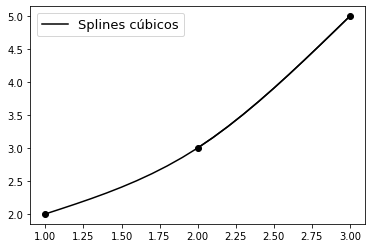

In [ ]:
cubic_spline([1,2,3], [2,3,5])

In [ ]:
def f(t):
    return 1 + 1.5*t - 0.75*t**2 + 0.25*t**3

In [ ]:
def g(t):
    return 5 - 4.5*t + 2.25*t**2 - 0.25*t**3

In [ ]:
from sympy import *

In [ ]:
y = symbols('y')

In [ ]:
dif = 1 + 1.5*y - 0.75*y**2 + 0.25*y**3

In [ ]:
dig = 5 - 4.5*y + 2.25*y**2 - 0.25*y**3

In [ ]:
diff(dif,y)

0.75*y**2 - 1.5*y + 1.5

In [ ]:
diff(dig,y)

-0.75*y**2 + 4.5*y - 4.5

In [ ]:
def df(t):
    return 1.5 - 1.5*t + 0.75*t**2

In [ ]:
df(1) 

0.75

In [ ]:
def dg(t):
    return - 4.5 + 4.5*t - 0.75*t**2

In [ ]:
dg(3)

2.25

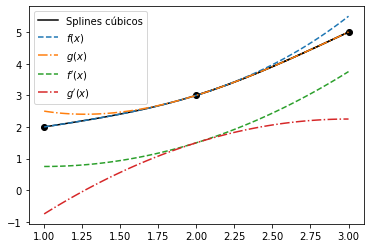

In [ ]:
x = np.linspace(1,3,101)
cubic_spline([1,2,3], [2,3,5])
plt.plot(x, f(x), '--', label="$f(x)$")
plt.plot(x, g(x), '-.', label="$g(x)$")
plt.plot(x, df(x), '--', label="$f'(x)$")
plt.plot(x, dg(x), '-.', label="$g'(x)$")
plt.legend()
plt.show()

### Spline Cúbico Modificado

Para 3 puntos tenemos 2 intervalos: $[t_1,t_2]$ y $[t_2,t_3]$, así que el interpolante requerido es una función cúbica a trozos definida por 2 polinomios cúbicos. Sea

$$p_\alpha(t) = \alpha_1 + \alpha_2 t + \alpha_3 t^2 + \alpha_4 t^3$$
el polinomio del primer intervalo, y
$$p_\beta(t) = \beta_1 + \beta_2 t + \beta_3 t^2 + \beta_4 t^3$$

el del segundo intervalo. Como queremos que $s$ pase por los puntos (1, 2), (2, 3) y (3, 5) y que $s'(1) = 2$ y $s'(3) = 1$, sacrificamos las condiciones del spline cúbico natural de que la segunda derivada en los extremos sea cero por estas condiciones, y el sistema de ecuaciones a resolver es el siguiente

$$Ax = 
\begin{pmatrix}
    1 & t_1 & t_1^2 & t_1^3 & 0 & 0 & 0 & 0 \\
    1 & t_2 & t_2^2 & t_2^3 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 1 & t_2 & t_2^2 & t_2^3 \\
    0 & 0 & 0 & 0 & 1 & t_3 & t_3^2 & t_3^3 \\
    0 & 1 & 2t_2 & 3t_2^2 & 0 & -1 & -2t_2 & -3t_2^2 \\
    0 & 0 & 2 & 6t_2 & 0 & 0 & -2 & -6t_2 \\
    0 & 1 & 2t_1 & 3t_1^2 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 1 & 2t_3 & 3t_3^2 \\
\end{pmatrix}
\begin{pmatrix}
    \alpha_1 \\
    \alpha_2 \\
    \alpha_3 \\
    \alpha_4 \\
    \beta_1 \\
    \beta_2 \\
    \beta_3 \\
    \beta_4 \\
\end{pmatrix}
=
\begin{pmatrix}
    2 \\
    3 \\
    3 \\
    5 \\
    0 \\
    0 \\
    2 \\
    1 \\
\end{pmatrix}
= y$$

Las primeras 2 ecuaciones son el polinomio $p_\alpha(t)$ evaluado en los extremos $t_1$ y $t_2$ del primer intervalo y las 2 ecuaciones siguientes son el polinomio $p_\beta(t)$ evaluado en los extremos $t_2$ y $t_3$ del segundo intervalo. Las ecuaciones 2 y 3 deben cumplir que $p_\alpha(t_2) = p_\beta(t_2)$. Las ecuaciones 5 y 6 cumplen la condición de continuidad en la primera derivada en $t_2$, y en la segunda derivada, respectivamente. Finalmente, las ecuaciones 7 y 8 cumplen $s'(t_1) = 2$ y $s'(t_3) = 1$.

In [ ]:
def cubic_spline_mod(t,s):
    
    n = len(t)
    A = np.zeros([8,8])

    for i in range(n-2): #Aquí estoy tomando todos los puntos y al final escojo los que quiero graficar

        for j in range(4):
            A[0,j] = t[i]**j
            A[1,j] = t[i+1]**j
            A[2,4+j] = t[i+1]**j
            A[3,4+j] = t[i+2]**j
        for j in range(3):
            A[4,j+1] = (j+1)*t[i+1]**(j)
            A[4,j+5] = -(j+1)*t[i+1]**(j)
        A[5,2] = 2
        A[5,3] = 6*t[i+1]
        A[5,6] = -2
        A[5,7] = -6*t[i+1]
#         A[6,2] = 2
#         A[6,3] = 6*t[i]
#         A[7,6] = 2
#         A[7,7] = 6*t[i+2]
        for j in range(3):
            A[6,j+1] = (j+1)*t[i]**(j)
            A[7,j+5] = (j+1)*t[i+2]**(j)

        y = np.zeros(8)
        y[0] = s[i]
        y[1] = s[i+1]
        y[2] = s[i+1]
        y[3] = s[i+2]
        y[6] = 2
        y[7] = 1

        c = la.solve(A,y)
        α = c[0:4]
        β = c[4:8]
        x1 = np.linspace(t[i],t[i+1],11)
        x2 = np.linspace(t[i+1],t[i+2],11)
        plt.plot(x1, pol(x1,α), 'k')
        plt.plot(x2, pol(x2,β), 'k', label='Splines cúbicos')
        
    plt.plot(t, s, 'ko')
    plt.legend(fontsize=13)
    
    return α,β

(array([-4. , 11.5, -7. ,  1.5]), array([ 20. , -24.5,  11. ,  -1.5]))

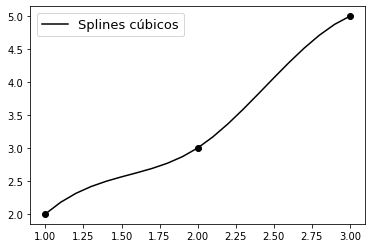

In [ ]:
cubic_spline_mod([1,2,3], [2,3,5])

In [ ]:
def f(t):
    return - 4 + 11.5*t - 7*t**2 + 1.5*t**3

In [ ]:
def g(t):
    return 20 - 24.5*t + 11*t**2 - 1.5*t**3

In [ ]:
dif = - 4 + 11.5*y - 7*y**2 + 1.5*y**3

In [ ]:
dig = 20 - 24.5*y + 11*y**2 - 1.5*y**3

In [ ]:
diff(dif,y)

4.5*y**2 - 14*y + 11.5

In [ ]:
diff(dig,y)

-4.5*y**2 + 22*y - 24.5

In [ ]:
def df(t):
    return 4.5*t**2 - 14*t + 11.5

In [ ]:
df(1) 

2.0

In [ ]:
def dg(t):
    return - 4.5*t**2 + 22*t - 24.5

In [ ]:
dg(3)

1.0

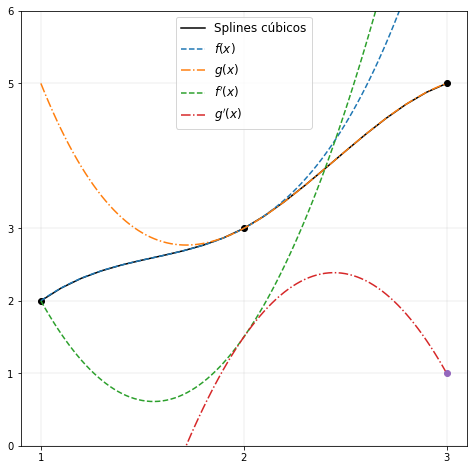

In [ ]:
x = np.linspace(1,3,101)
plt.figure(figsize=(8,8))
cubic_spline_mod([1,2,3], [2,3,5])
plt.plot(x, f(x), '--', label="$f(x)$")
plt.plot(x, g(x), '-.', label="$g(x)$")
plt.plot(x, df(x), '--', label="$f'(x)$")
plt.plot(x, dg(x), '-.', label="$g'(x)$")
plt.plot(3, 1, 'o')
plt.ylim(0,6)
plt.yticks([0,1,2,3,5,6])
plt.xticks([1,2,3])
plt.legend(fontsize=12)
plt.grid(lw=0.2)

# 6

Sea $f$ una función de valores reales definida sobre un intervalo cerrado $I$ tal que $f(I) \subset I$. Suponga que existe una constante $L \in [0, 1)$ tal que

$$|f(x) − f(y)| ≤ L|x − y| \quad ∀x, y ∈ I$$

**a)** Dado $x_0 ∈ I$, pruebe que la sucesión $\{x_n\}$ dada por $x_{n+1} = f(x_n)$ converge.

Como
$$|x_{n+1} - x_n| = |f(x_n) - f(x_{n-1})| \leq L|x_n - x_{n-1}| = L|f(x_{n-1}) - f(x_{n-2})| \leq L^2|x_{n-1} - x_{n-2}|$$

$$\leq \cdots \leq L^{n}|x_1 - x_0|$$

y como $0 \leq L < 1$, entonces $$\underset{n \to \infty}{\lim} L^{n} = 0$$

entonces $\{x_n\}$ es de Cauchy y como $I$ es completo, entonces existe un límite $\underset{n\to\infty}{\lim}x_n = x_*$

Theo 5.5.2 (cf. 5.5.3) Stoer & Bulirsch, agregando la hipótesis de que $x_*$ es punto fijo

$$|x_{n+1} - x_*| = |f(x_n) - f(x_*)| \leq L|x_n - x_*| \leq L^{n+1}|x_0 - x_*|$$

esto es $$\frac{|e_{n+1}|}{|e_n|} \leq L$$

y como $0 \leq L < 1$, entonces $$\underset{n \to \infty}{\lim} L^{n+1} = 0$$

por lo tanto $\{x_{n}\}$ converge por lo menos linealmente.

$ $

**b)** Pruebe que el límite $x_∗$ de la sucesión ${x_n}$ es punto fijo de $f$.

Como $\forall\ n \geq 0$ $$|f(x_*) - x_*| \leq |f(x_*) - f(x_n)| + |f(x_n) - x_*| \leq L|x_* - x_n| + |x_{n+1} - x_*|$$

y como $\{x_{n}\}$ converge a $x_*$, entonces $$\underset{n \to \infty}{\lim} |x_* - x_n| = 0$$

y por lo tanto $$x_* = f(x_*)$$
i.e. $x_*$ es punto fijo de $f$.

$ $

**c)** Supónga además que $f$ es una función tres veces diferenciable sobre $I$ tal que $f'(x_∗) = 0$ y $f''(x_∗) \neq 0$.
Pruebe que la convergencia de la sucesión $\{x_{n}\}$ es cuadrática.

Heath 5.4

<u>Definición</u>: Sea $e_{n} = x_{n} - x_*$ el error en la $n$-ésima iteración, donde $x_n$ es la solución aproximada y $x_*$ el valor real. Un método iterativo se dice que converge con tasa $r$ si
$$\underset{n\to\infty}{\lim} \frac{|e_{n+1}|}{|e_n|^r} = C$$
para alguna constante finita $C>0$.

Heath 5.5.2

Si $x_*$ es un punto fijo, entonces para el error en la $n$-ésima iteración tenemos que

$$e_{n+1} = x_{n+1} - x_* = f(x_n) - f(x_*)$$

Por el teorema del valor medio, $\exists\ \theta_n$ entre $x_n$ y $x_*$ tal que

$$f(x_n) - f(x_*) = f'(\theta_n)(x_{n} - x_*)$$
entonces
$$e_{n+1} = f'(\theta_n)e_n$$

No conocemos el valor de $\theta_n$, pero si $|f'(x_*)| < 1$ entonces, empezando las iteraciones suficientemente cerca de $x_*$, podemos asegurarnos de que existe una constante $C$ tal que $$|f'(\theta_n)| \leq C < 1$$
para $n=0,1,\dots$

Entonces $$|e_{n+1}| \leq C|e_n| \leq \cdots \leq C^n|e_0|$$

pero $C < 1$ implica que $C^n \to 0$, entonces $|e_n| \to 0$ y la sucesión converge (pues si $x_* = f(x_*)$ y $|f'(x_*)| < 1$, entonces el esquema iterativo $x_{n+1} = f(x_n)$ es localmente convergente, i.e. existe un intervalo que contiene a $x_*$ tal que una iteración de punto fijo con $f$ converge si inicia en un punto dentro de ese intervalo).

En una iteración de punto fijo, la convergencia es lineal con $C = |f'(x_*)|$, mientras menor sea la constante más rápida es la convergencia, así que idealmente $f'(x_∗) = 0$, como en la hipótesis, en cuyo caso del teorema de Taylor obtenemos

$$f(x_n) - f(x_*) = f''(\xi_n)\frac{(x_{n} - x_*)^2}{2}$$
para alguna $\xi_n$ entre $x_n$ y $x_*$, entonces
$$\underset{n\to\infty}{\lim} \frac{|e_{n+1}|}{|e_n|^2} = \left|\frac{f''(x_*)}{2}\right|$$

y por lo tanto la convergencia es por lo menos cuadrática